# Integração Numérica dos Coeficientes de Fourier
## MÁ IDEIA

Neste notebook tentaremos mostrar por que razão a integração numérica dos coefientes de Fourier, conforme proposta no Rao, é uma **má ideia.**

Vamos definir uma função em um intervalo finito, e considerá-la periódica. Para facilitar e ficar bonitinho, vamos usar uma função que seja nula nas extremidades do intervalo.


## Setup

In [1]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import ipywidgets as widgets

In [2]:
def signal(t):
    return -t*(t-2)*np.exp(t)

## Período e frequência fundamentais
Vamos considerar a função periódica, definida no intervalo de 0 a 2.
Assim, o período fundamental é 2 e a frequência fundamental é $2\pi/\omega$.

In [3]:
τ = 2
f = 1/τ
ω = 2*np.pi*f
print(f"Período fundamental: {τ} s")
print(f"Frequência fundamental: {f} Hz")
print(f"Frequência circular fundamental: {ω} rad/s")

Período fundamental: 2 s
Frequência fundamental: 0.5 Hz
Frequência circular fundamental: 3.141592653589793 rad/s


## Amostragem

Para que um sinal analógico seja processado em um computador, ele deve ser amostrado em intervalos periódicos. Vamos considerar que estamos amostrando a cada centésimo de segundo.

In [4]:
dt = 0.01
times = np.linspace(0, τ, int(np.ceil(τ/dt))+1)
print(times[:10])
print(times[-10:])

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09]
[1.91 1.92 1.93 1.94 1.95 1.96 1.97 1.98 1.99 2.  ]


## Função original

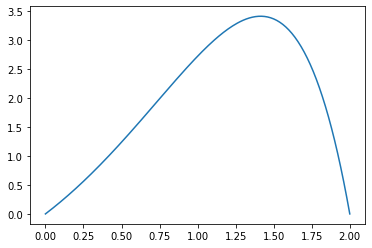

In [5]:
fig, ax  = plt.subplots()
ax.plot(times, signal(times))
plt.show()

## Coeficientes de Fourier

Em contraste com o que a figura do Rao insinua, apesar de o texto e as fórmulas estarem corretas, para calcular os coeficientes de Fourier você não integra a função diretamente, mas multiplicada pelos harmônicos do seno e cosseno.

Para demonstração aqui vamos considerar apenas os termos em cosseno, com frequências múltiplas inteiras da frequência fundamental.

In [14]:

nw = widgets.BoundedIntText(value=10, min=1, max=20,
        description="hamônico nº:")

@widgets.interact(n=nw)
def make_plot(n):
    fig, ax  = plt.subplots()
    plt.grid(True)
    fig.set_size_inches(10, 9)
    ax.plot(times, signal(times)*np.cos(n*ω*times))
    ax.plot(times, signal(times))
    fig.set_visible(True)

interactive(children=(BoundedIntText(value=10, description='hamônico nº:', max=20, min=1), Output()), _dom_cla…

## Amostragem com baixa frequência

Até aqui parece tudo normal, mas vamos ver o que acontece com esta figura quando
tentamos usar frequências de amostragem menores, isto é, "dt" maiores.

No gráfico abaixo, dt deve ser dado em centésimos de segundos.

Experimente por exemplo o harmônico 15.

In [26]:
dtw = widgets.BoundedIntText(value=1, min=1, max=200,
        description="Período amostragem (x100 s):")
nw = widgets.BoundedIntText(value=10, min=1, max=20,
        description="hamônico nº:")

@widgets.interact(n=nw, dt=dtw)
def make_plot(n, dt):
    dt /= 100.0
    hp = 2*np.pi/(n*ω)
    print(f"Período do harmônico: {hp:.3f} (s),"
          f" frequência do harmônico {1/hp} (Hz)")
    print(f"Período de amostragem: {dt:.3f} (s),"
          f" frequência de amostragem {1/dt} (Hz)")
    times = np.linspace(0, τ, int(np.ceil(τ/dt))+1)
    fig, ax  = plt.subplots()
    plt.grid(True)
    fig.set_size_inches(10, 9)    
    ax.plot(times, signal(times)*np.cos(n*ω*times))
    ax.plot(times, signal(times))
    fig.set_visible(True)

interactive(children=(BoundedIntText(value=10, description='hamônico nº:', max=20, min=1), BoundedIntText(valu…